<div style="text-align: center;">
    
# 3a parte: agrupamento de países por dados sócio-econômicos
    
</div>

# **Sumário**
 
 - [Imports](#Imports)
     - [Page Formatting](#PageFormatting)
     - [Data Collection](#DataCollection)
 - [Objetivo](#Objetivo)
 - [Análise Inicial dos Dados](#AnaliseInicial)
 - [Limpeza dos Dados](#Limpeza)
     - [Transformação de valores](#Transformacao)
     - [Tratano Outliers](#Outliers)
     - [Normalização dos Dados](#Normalizacao)
 - [Análise dos Dados](#Analise)
     - [Univariada](#Univariada)
     - [Bivariada](#Bivariada)
         - [Correlação dos Dados](#Correlacao)
 - [Teste de Hopkins](#Hopkins)
 - [Clustering](#Clustering)
     - [Determinação do número de clusters](#numero)
         - [Usando a métrica de inércia](#inercia)
         - [Usando a métrica do Silhouette Score](#Silhouette) 
     - [Análise de Clustering Hierárquico - Técnica de Linkage](#Linkage)
         - [Método de Ligação Simples (single linkage)](#Simples)
         - [Método de Linkagem Completa ](#Completa)
 - [Gerando o Agrupamento](#Agrupamento)
     - [K-Means](#K-Means)
     - [Agrupamento Hierárquico](#Hierárquico)
 - [Analisando os Agrupamentos](#Analisando)
 - [Referências](#Reference)  

<a id="Imports"></a>
# 0.Imports

In [1]:
from IPython.core.display import HTML

import pandas as pd 
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# For Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# For K Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')


<a id="PageFormatting"></a>
## 0.1.Page Formatting

In [2]:
# Código de Cores ANSI
azul = "\033[38;2;10;31;68m"
verde = "\033[38;5;82m"
verde_escuro = "\033[38;2;0;100;0m"
laranja = "\033[38;5;208m"
reset = '\033[0m'

HTML('''
<style>
    /* Aplicar fonte monoespaçada a todo o notebook */
    body, div.text_cell_render, div.code_cell pre, h1, h2, h3, h4, p {
        font-family: "Courier New", Consolas, Monaco, monospace; /* Fonte monoespaçada */
    }
    
    /* Estilo para h1 */
    h3{ 
        color: #0a1f44;            /* Cor do texto (azul marinho) */
        background-color: #dcdde1; /* Fundo azul escuro (cinza mais escuro) */
        border-radius: 8px;        /* Bordas arredondadas */
        padding: 10px;
    }
    
    /* Estilo para h2 */
    h1{
        color: #dcdde1;            /* Cor do texto (cinza claro) */
        background-color: #0a1f44; /* Fundo azul escuro (azul marinho) */
        border-radius: 8px;        /* Bordas arredondadas */
        padding: 10px;
    }
    
    /* Estilo para h3 */
    h2{
        color:#dcdde1;            /* Cor do texto (azul mais claro) */
        background-color: #40739e; /* Fundo azul escuro (cinza mais escuro) */
        border-radius: 8px;        /* Bordas arredondadas */
        padding: 10px;
    }
    
    /* Estilo para h4 e h5 */
    h4, h5 {
        background-color:#40739e;  /* Fundo azul marinho */
        color: white;               /* Texto branco */
        border-radius: 8px;         /* Bordas arredondadas */
        padding: 10px;
    }
</style>
''')

<a id="DataCollection"></a>
## 0.2.Data Collection

In [3]:
df = pd.read_csv(r"C:\Users\Yago\Desktop\GitHubLocal\UFC\DataMining\Lista1\L1P3\data\Country-data.csv")


In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<a id="Objetivo"></a>
# Objetivo

<div style="text-align: justify;">
Categorizar os países usando fatores socioeconômicos e de saúde que determinam o desenvolvimento geral do país.

Sobre a organização:
A HELP International é uma ONG humanitária internacional que está comprometida em combater a pobreza e fornecer às pessoas de países subdesenvolvidos ​​comodidades básicas e alívio durante desastres e calamidades naturais.

Descrição do problema:
A HELP International conseguiu arrecadar cerca de US$ 10 milhões. Agora, o CEO da ONG precisa decidir como usar esse dinheiro de forma estratégica e eficaz. Então, o CEO precisa tomar a decisão de escolher os países que mais precisam de ajuda. Portanto, seu trabalho como cientista de dados é categorizar os países usando alguns fatores socioeconômicos e de saúde que determinam o desenvolvimento geral do país. Então, você precisa sugerir os países nos quais o CEO precisa se concentrar mais.
</div>

<a id="AnaliseInicial"></a>
# Análise Inicial dos Dados

In [5]:
df.shape

(167, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<font color = "blue"> **Comentários:**</font>

- Todas as colunas têm 167 valores não nulos, o que significa que não há valores ausentes no DataFrame.
- 7 colunas (float64)
- 2 colunas (int64)
- 1 coluna  (object),

In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<a id="Limpeza"></a>
# Limpeza dos Dados

In [8]:
df2 = df.copy()

In [9]:
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<a id="Transformacao"></a>
## Transformação de valores

In [10]:
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


- 'exportações', 'saúde', 'importações' são dados em percentagem do PIB. Esses recursos devem ser convertidos em seus valores reais para melhorar a análise.

In [11]:
df2[['exports','health','imports']] = df2[['exports','health','imports']].apply(lambda x : x*df2["gdpp"]/100)

In [12]:
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


<a id="Outliers"></a>
## Tratano Outliers

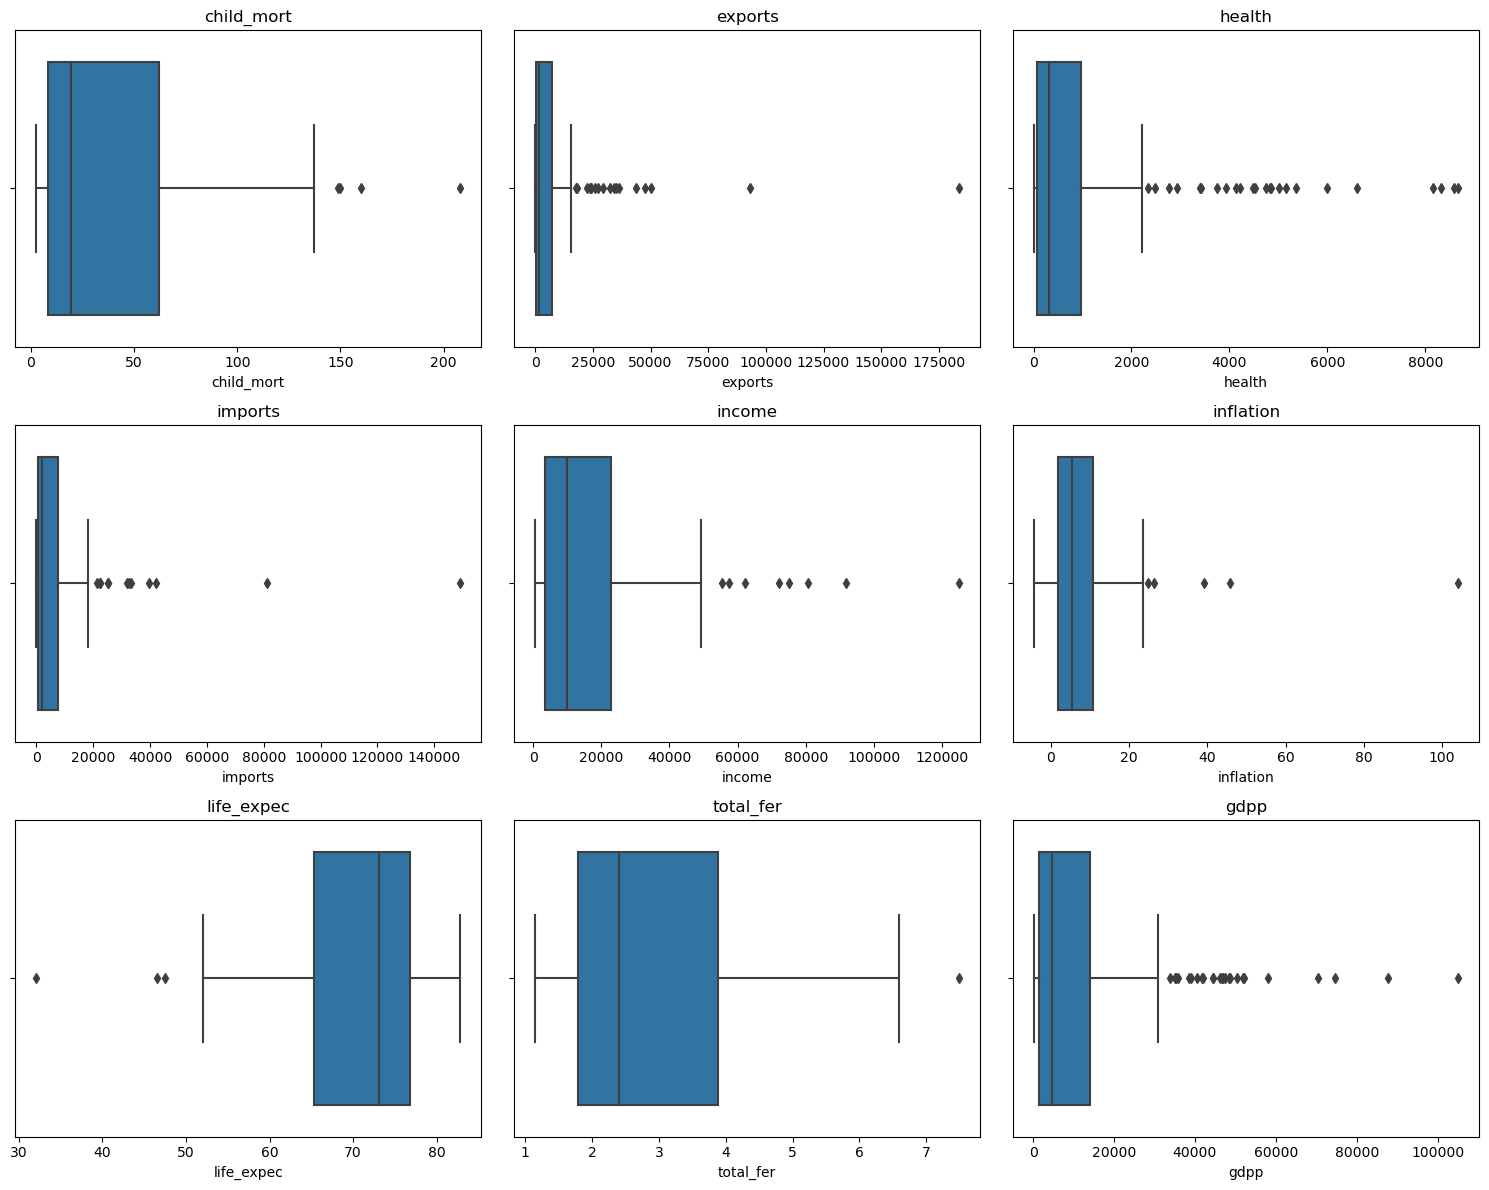

In [13]:
# Criar subplots - 3 linhas, 3 colunas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Iterar sobre os eixos e as colunas do DataFrame (ignorando a coluna 'country')
for feature, ax in zip(df.drop('country', axis=1).columns, axes.flat):
    sns.boxplot(data=df2, x=feature, ax=ax)  
    ax.set_title(feature, fontsize=12)  

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir a figura
plt.show()

In [14]:
df_not_outliers = df.iloc[:,:]

def outliers_for_features(df, col):    
    Q1 = df.loc[:,col].quantile(0.25)
    Q3 = df.loc[:,col].quantile(0.75)
    
    upper_limit = Q3 + 1.5*(Q3-Q1)
    lower_limit = Q1 - 1.5*(Q3-Q1)
    
    return df_not_outliers[col].apply(lambda x : upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)
    
for col in ['life_expec','inflation', 'total_fer', 'exports', 'imports', 'health', 'income', 'gdpp']:
    df2[col] = outliers_for_features(df2, col)

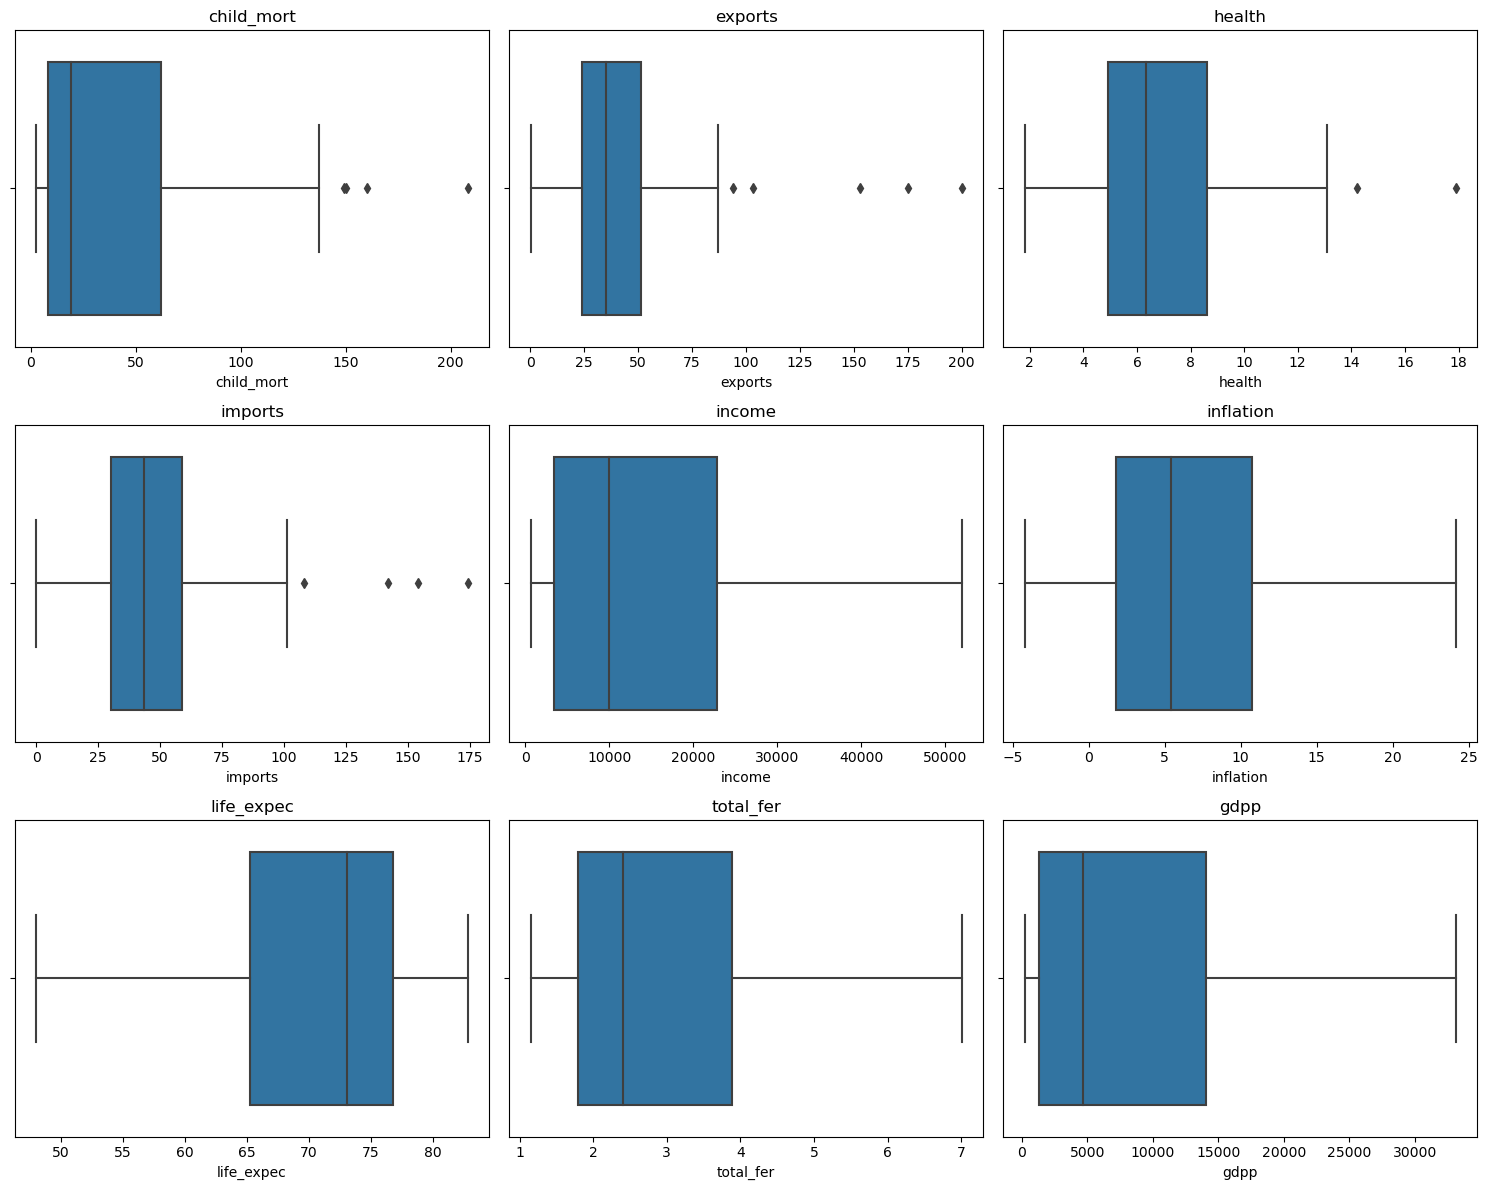

In [15]:
# Criar subplots - 3 linhas, 3 colunas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Iterar sobre os eixos e as colunas do DataFrame (ignorando a coluna 'country')
for feature, ax in zip(df.drop('country', axis=1).columns, axes.flat):
    sns.boxplot(data=df2, x=feature, ax=ax)  # Associar ao eixo correspondente
    ax.set_title(feature, fontsize=12)  # Título para cada subplot

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir a figura
plt.show()

In [16]:
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


<a id="Normalizacao"></a>
## Normalização dos Dados

In [17]:
standard_scaler = StandardScaler()
df_scaled = standard_scaler.fit_transform(df2.iloc[:, 1:])

In [18]:
df_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.70222504,
         1.91527602, -0.84634107],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.66332125,
        -0.86277926, -0.54082746],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.68685903,
        -0.03669088, -0.50886816],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28671687,
        -0.66291917, -0.78095407],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.37234081,
         1.14914567, -0.78095407],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.19651829,
         1.63547189, -0.7679976 ]])

<a id="Analise"></a>
# Análise dos Dados

<a id="Univariada"></a>
## Univariada

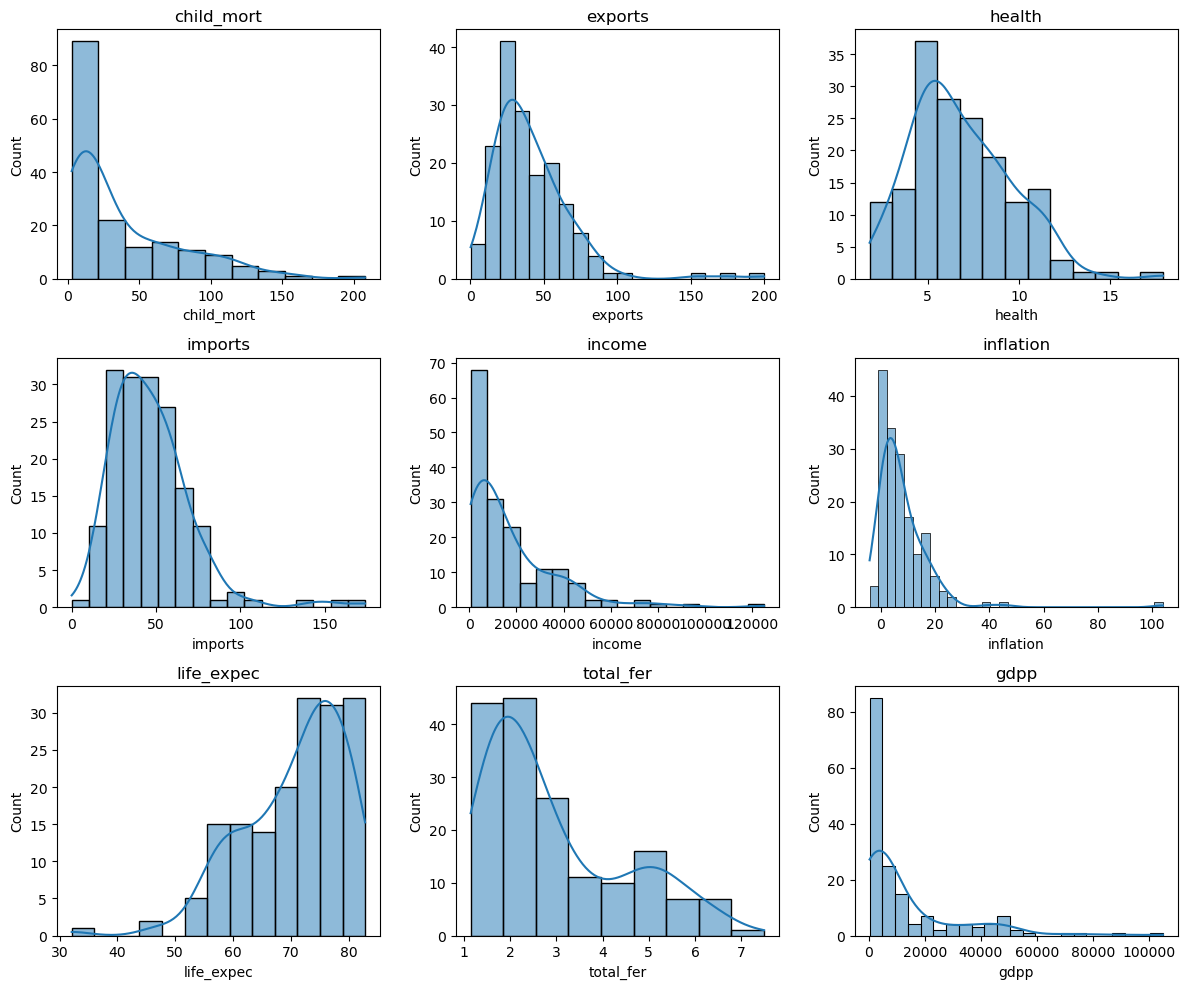

In [19]:
# Criar figura com subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))  # 6 linhas, 3 colunas

# Iterar sobre as colunas e os eixos
for i, (feature, ax) in enumerate(zip(df.drop('country', axis=1).columns, axes.flat)):
    sns.histplot(df[feature], ax=ax, kde=True)  # Plot no eixo correspondente
    ax.set_title(feature)  # Adicionar título para cada subplot

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Mostrar a figura inteira
plt.show()

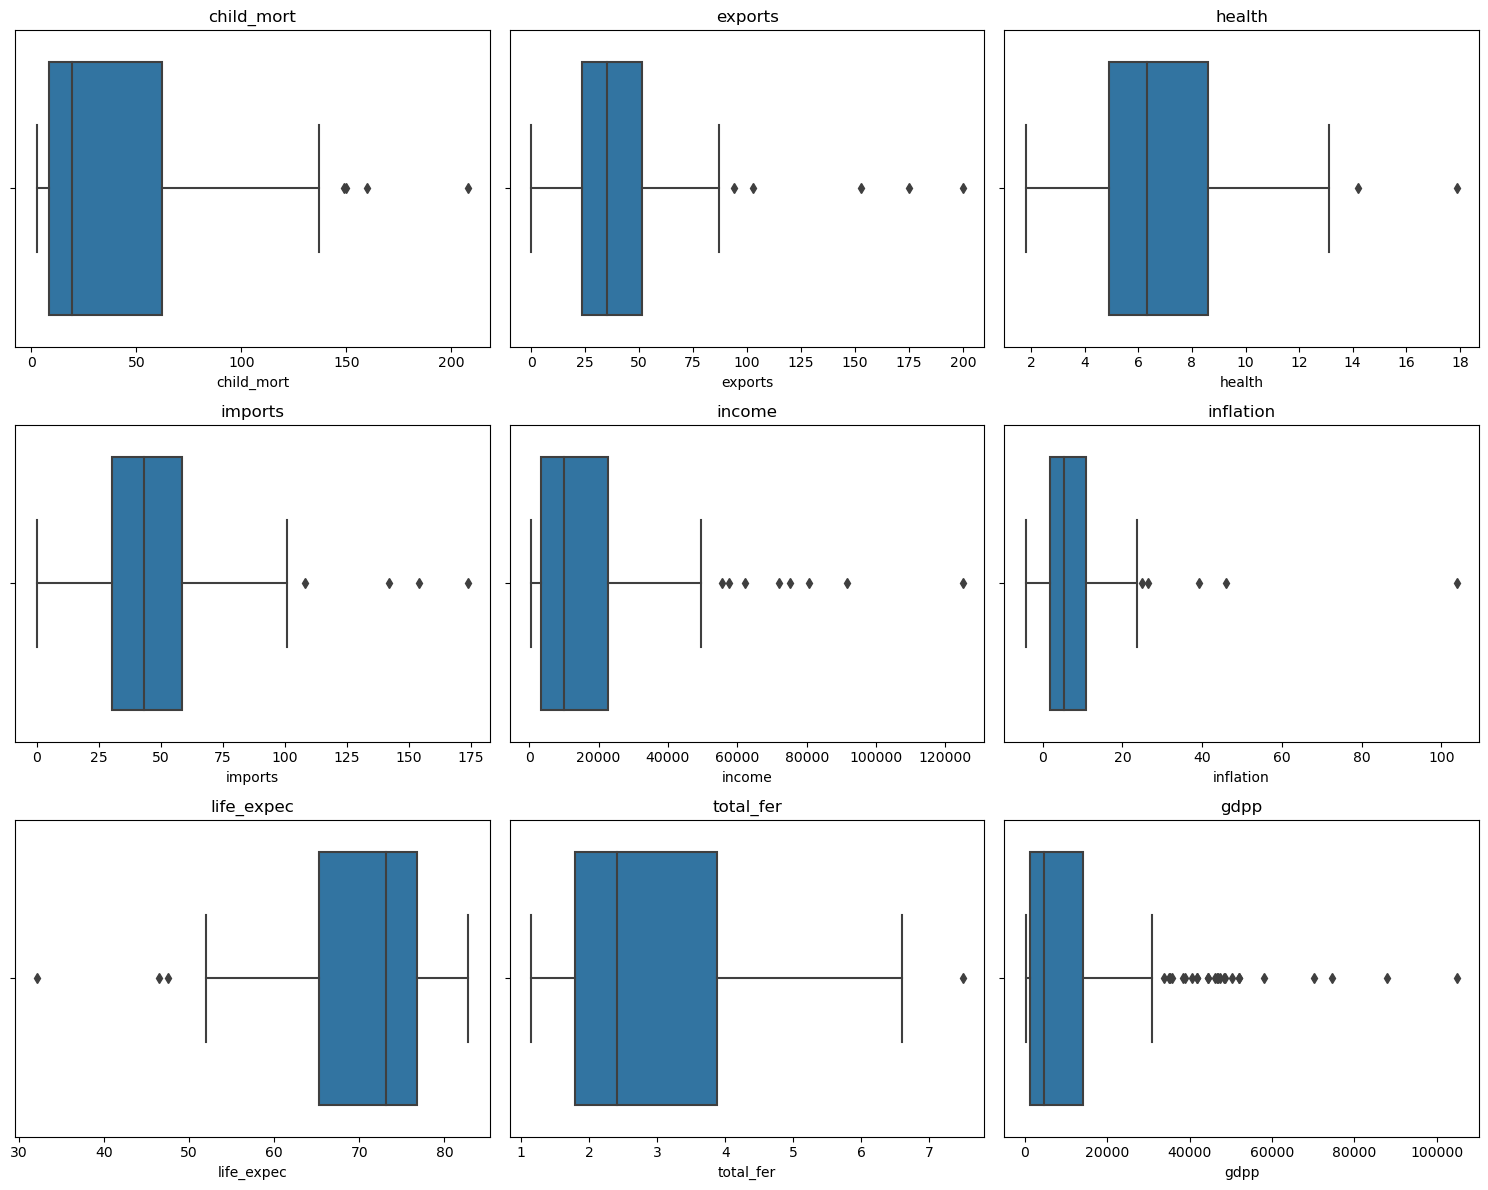

In [20]:
# Criar subplots - 3 linhas, 3 colunas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Iterar sobre os eixos e as colunas do DataFrame (ignorando a coluna 'country')
for feature, ax in zip(df.drop('country', axis=1).columns, axes.flat):
    sns.boxplot(data=df, x=feature, ax=ax)  # Associar ao eixo correspondente
    ax.set_title(feature, fontsize=12)  # Título para cada subplot

# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir a figura
plt.show()

<a id="Bivariada"></a>
## Bivariada

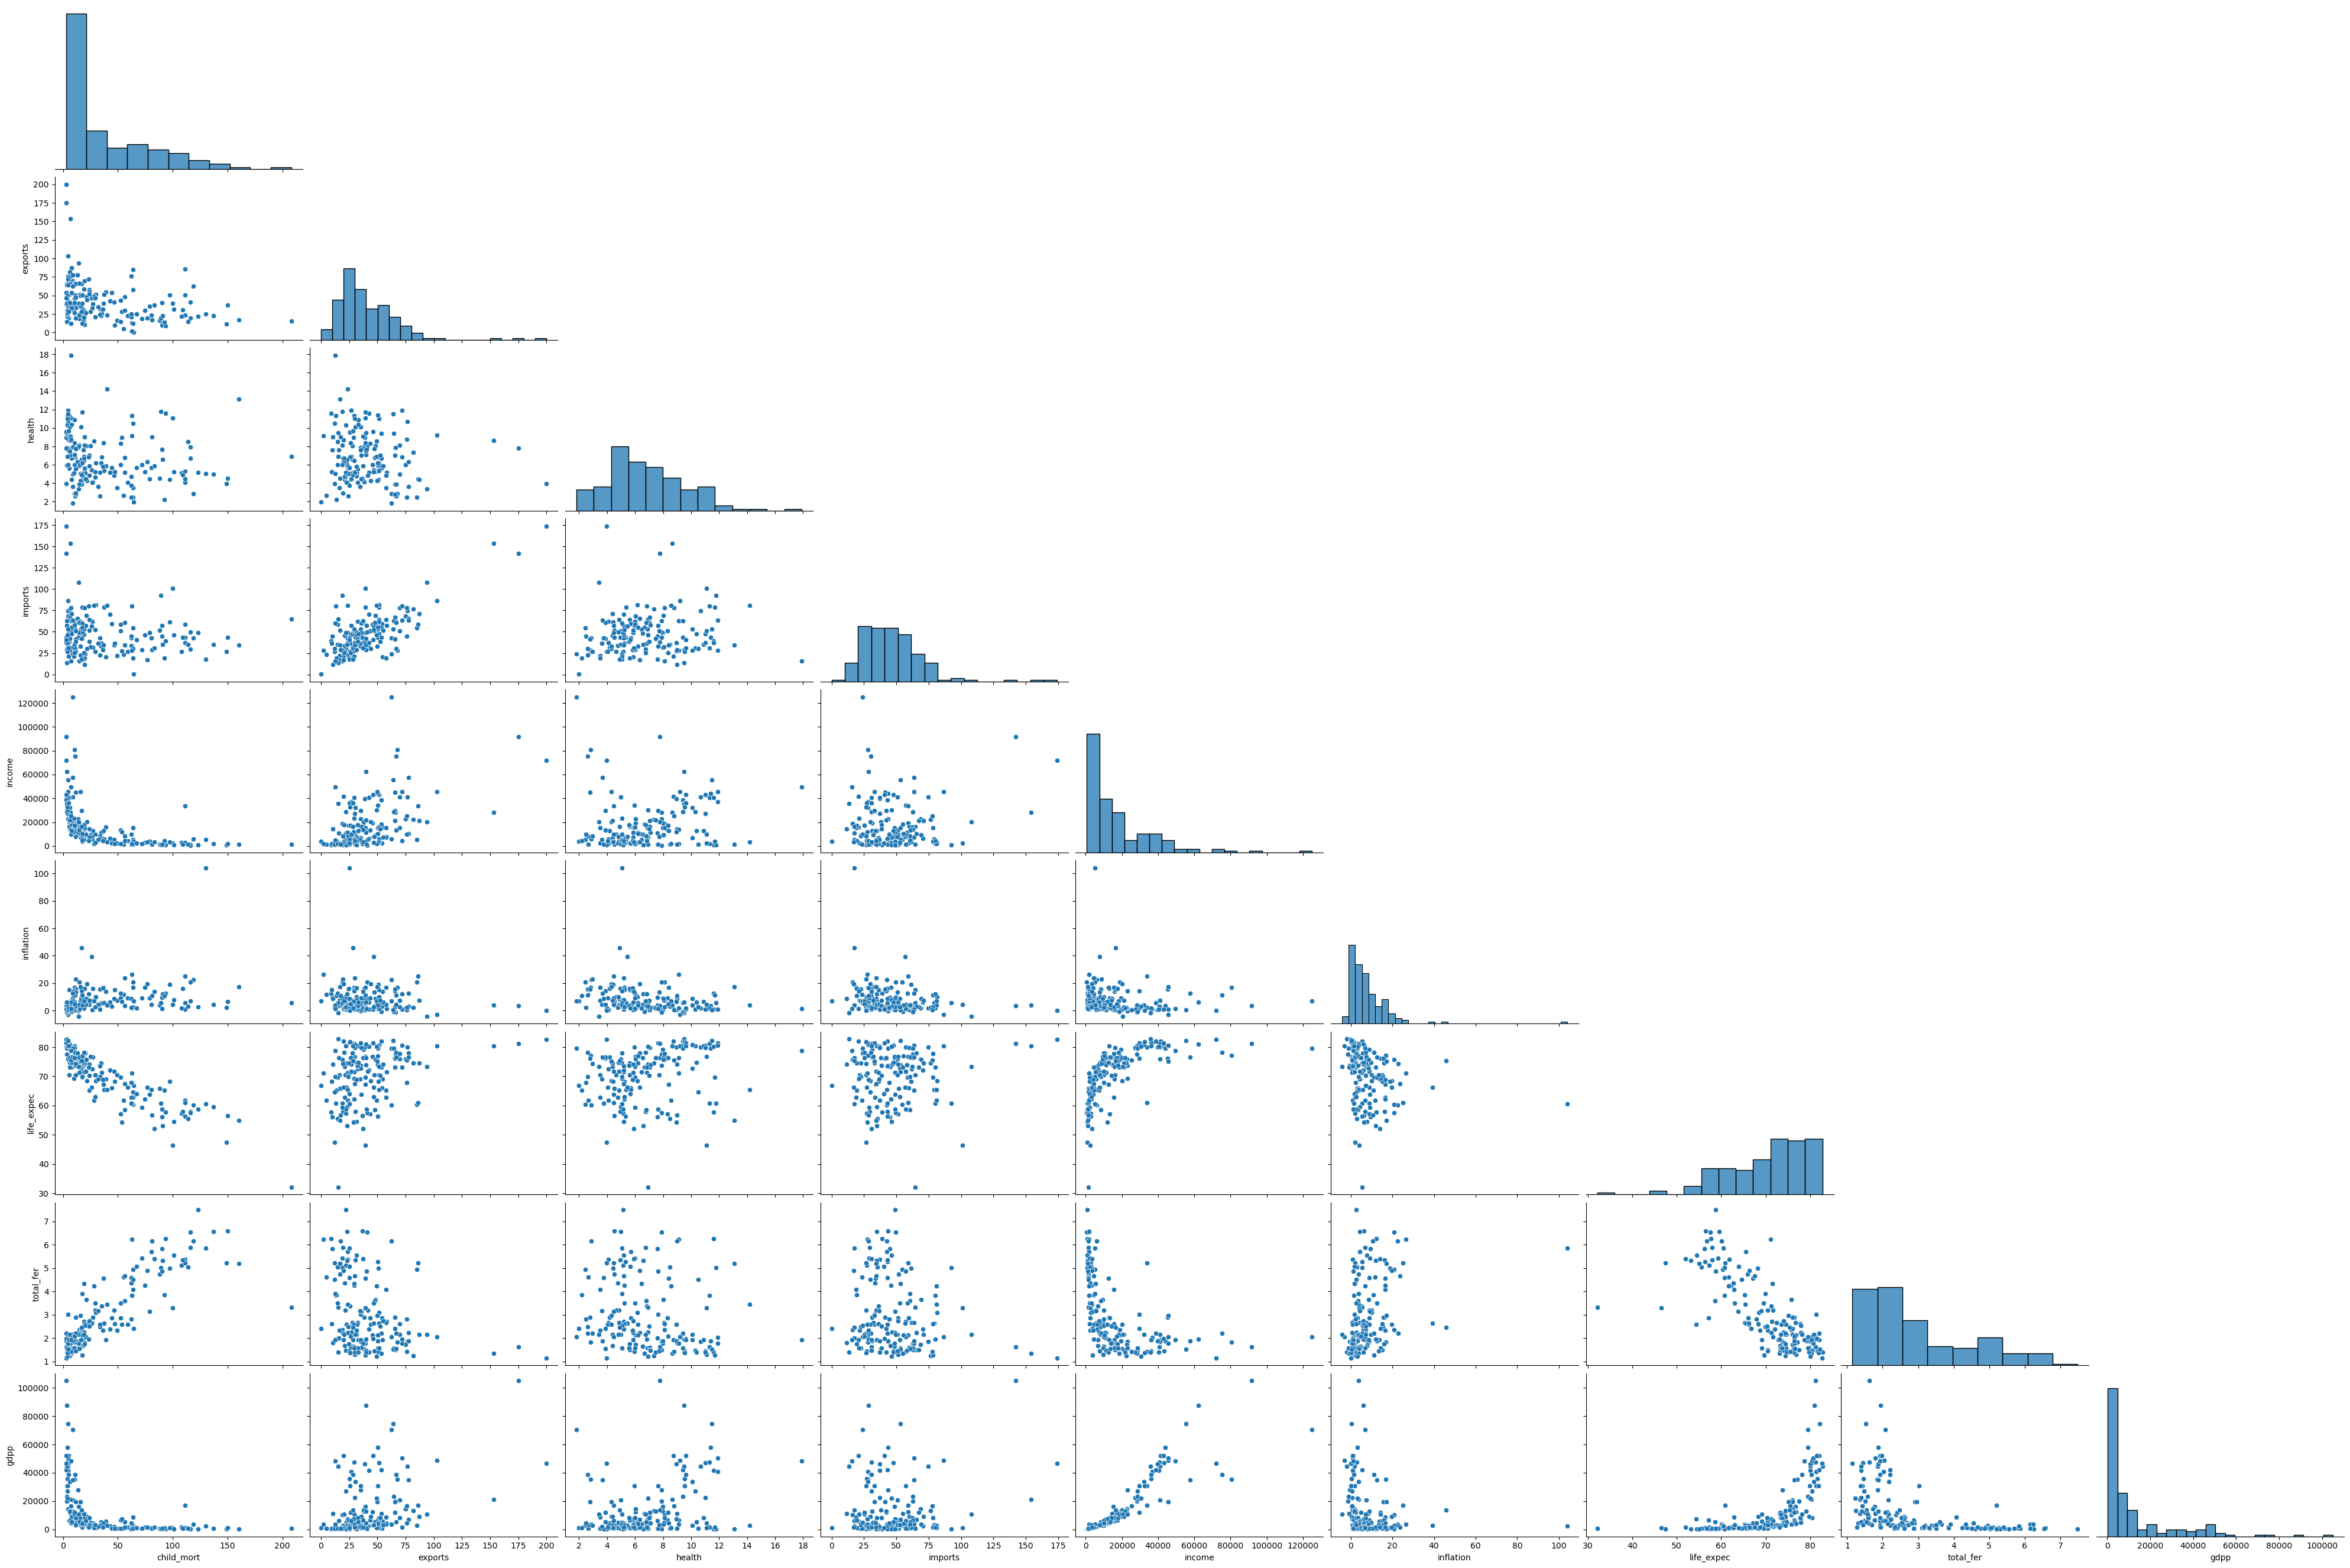

In [21]:
sns.pairplot(df,palette='viridis', height=3, aspect=1.5, corner=True)
plt.show()

<a id="Correlacao"></a>
### Correlação das variáveis

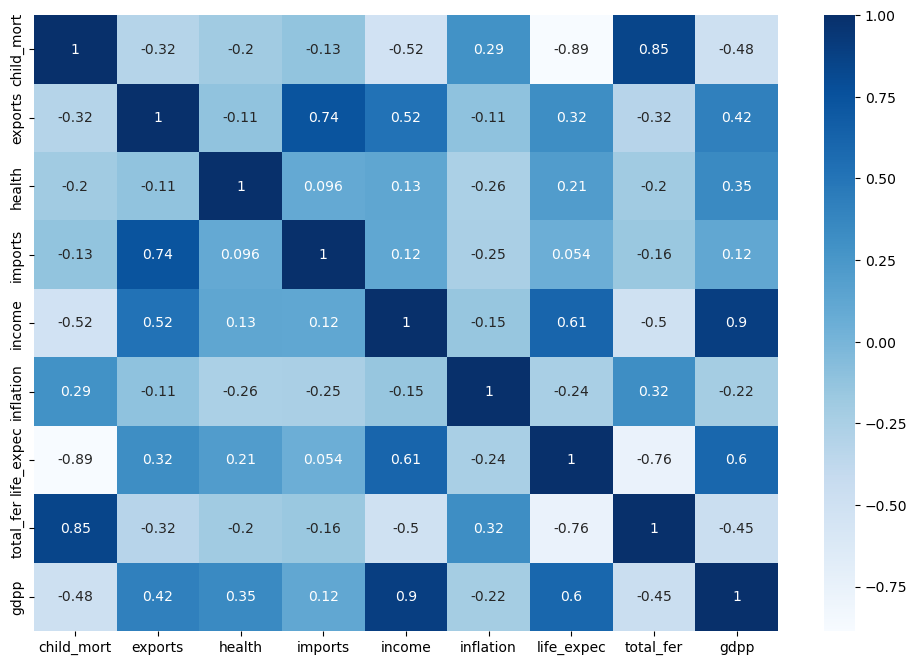

In [22]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

<a id="Hopkins"></a>
# Teste de Hopkins

Verificando a adequação do conjunto de dados para clustering

In [23]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [24]:
hopkins(df.drop('country', axis = 1))

0.9678476869852451

In [25]:
hopkins(df2.drop('country', axis = 1))

0.8888966854671053

<a id="Clustering"></a>
# Clustering

<a id="numero"></a>
## Determinação do número de clusters

<a id="inercia"></a>
### Usando a métrica de inércia

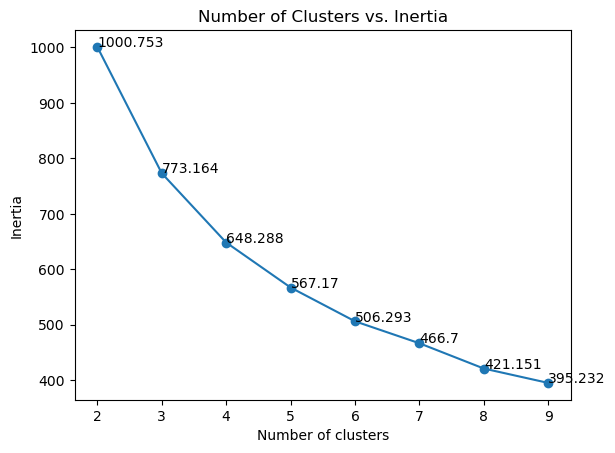

In [26]:
wcss = []
num_of_clusters = list(range(2,10))

for n in num_of_clusters:
    km = KMeans(n_clusters = n, max_iter = 50, random_state=101).fit(df_scaled)
    wcss.append(km.inertia_)
    
plt.plot(num_of_clusters, wcss, marker='o')

for xy in zip(num_of_clusters, wcss):    
    plt.annotate(text=round(xy[1], 3), xy=xy, textcoords='data')

plt.xlabel("Number of clusters")
plt.ylabel("Inertia") # Inertia is within cluster sum of squares
plt.title("Number of Clusters vs. Inertia")
plt.show()

<a id="Silhouette"></a>
### Usando a métrica do Silhouette Score

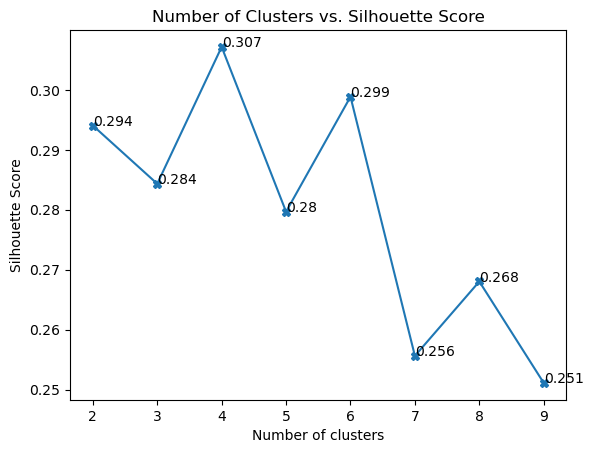

In [27]:
silhouette_value = []
for n in range(2,10):
    km = KMeans(n_clusters = n, random_state=101).fit(df_scaled)
    silhouette_value.append(silhouette_score(df_scaled, km.labels_))
    
plt.plot(num_of_clusters, silhouette_value, marker='X', label=silhouette_value)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score")

for xy in zip(num_of_clusters, silhouette_value):    
    plt.annotate(text=round(xy[1], 3), xy=xy, textcoords='data')
    
plt.show()

<a id="Linkage"></a>
## Análise de Clustering Hierárquico - Técnica de Linkage

<a id="Simples"></a>
### Método de Ligação Simples (single linkage)

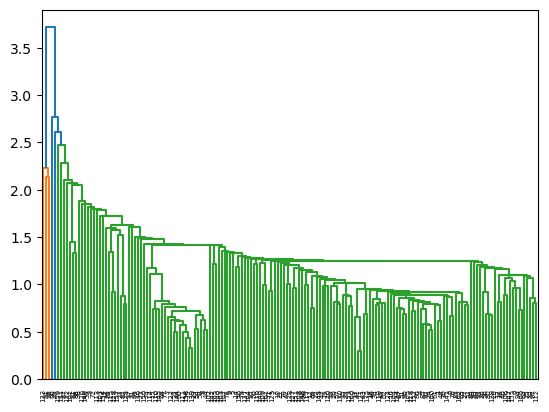

In [28]:
mergings_single = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

<a id="Completa "></a>
###  Método de Linkagem Completa 

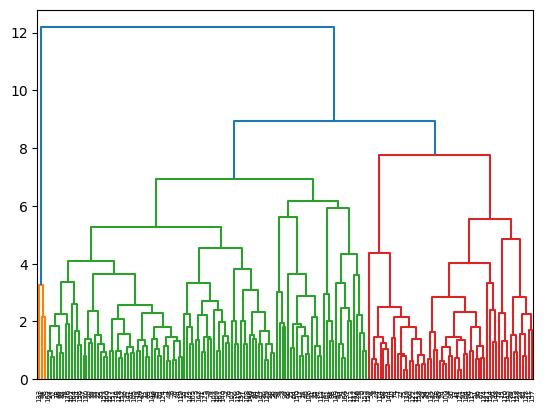

In [29]:
mergings_complete = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

<a id="Agrupamento"></a>
# Gerando o Agrupamento

<a id="K-Means"></a>
##  K-Means

In [30]:
# Construindo o modelo K Means com 3 clusters
km = KMeans(n_clusters=3, max_iter=100 , random_state = 101)
km.fit(df_scaled)

KMeans(max_iter=100, n_clusters=3, random_state=101)

In [31]:
print(km.labels_)
print(km.labels_.shape)

[1 2 2 1 2 2 2 0 0 2 0 0 2 2 2 0 2 1 2 2 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 0 0 2 2 2 2 1 1 0 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 0 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 0 2 1 1 2 2 1 0 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 0 1 2 2 2 2 2 0 0 2 2 1 2 0 1 2 2 1 0 0 0 1 1 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]
(167,)


<a id="Hierárquico"></a>
## Agrupamento Hierárquico

In [32]:
# Definindo 3 clusters para o agrupamento hierárquico
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
print(cluster_labels)
print(cluster_labels.shape)

[0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 0 0 0 1 0 0 0 0 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 2 1 1 0 0 1 1 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0]
(167,)


<a id="Analisando"></a>
## Analisando os Agrupamentos

In [33]:
df_clustered = df2.iloc[:,:]
df_clustered = pd.concat([df_clustered, pd.DataFrame(km.labels_, columns=['cluster_id_km'])], axis = 1)
df_clustered = pd.concat([df_clustered, pd.DataFrame(cluster_labels, columns=['cluster_id_hc'])], axis = 1)
df_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_km,cluster_id_hc
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,2,1


In [34]:
print(df_clustered['cluster_id_km'].value_counts())
print(df_clustered['cluster_id_hc'].value_counts())

2    78
1    48
0    41
Name: cluster_id_km, dtype: int64
0    108
1     56
2      3
Name: cluster_id_hc, dtype: int64


In [35]:

print("Cluster 0 of Hierarchical Clustering model")
print(df_clustered[df_clustered['cluster_id_hc'] == 0].country.unique())

print("Cluster 1 of Hierarchical Clustering model")
print(df_clustered[df_clustered['cluster_id_hc'] == 1].country.unique())

print("Cluster 2 of Hierarchical Clustering model")
print(df_clustered[df_clustered['cluster_id_hc'] == 2].country.unique())

Cluster 0 of Hierarchical Clustering model
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Cape Verde' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.'
 'Costa Rica' "Cote d'Ivoire" 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Fiji' 'Gabon' 'Gambia'
 'Georgia' 'Ghana' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'India' 'Indonesia' 'Iran' 'Iraq' 'Jamaica' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kiribati' 'Kyrgyz Republic' 'Lao' 'Lesotho' 'Liberia'
 'Madagascar' 'Malawi' 'Mali' 'Mauritania' 'Micronesia, Fed. Sts.'
 'Moldova' 'Mongolia' 'Morocco' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal'
 'Niger' 'Nigeria' 'Pakistan' 'Paraguay' 'Peru' 'Philippines' 'Romania'
 'Russia' 'Rwanda' 'Samoa' 'Senegal' 'Serb

In [36]:
print("Cluster 0 do modelo KMeans")
print(df_clustered[df_clustered['cluster_id_km'] == 0].country.unique())

print("Cluster 1 do modelo KMeans")
print(df_clustered[df_clustered['cluster_id_km'] == 1].country.unique())

print("Cluster 2 do modelo KMeans")
print(df_clustered[df_clustered['cluster_id_km'] == 2].country.unique())


Cluster 0 do modelo KMeans
['Australia' 'Austria' 'Bahamas' 'Bahrain' 'Belgium' 'Brunei' 'Canada'
 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Kuwait' 'Luxembourg' 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Oman'
 'Portugal' 'Qatar' 'Saudi Arabia' 'Singapore' 'Slovak Republic'
 'Slovenia' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'United Arab Emirates' 'United Kingdom' 'United States']
Cluster 1 do modelo KMeans
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Solomon Islands' 'South Africa' 

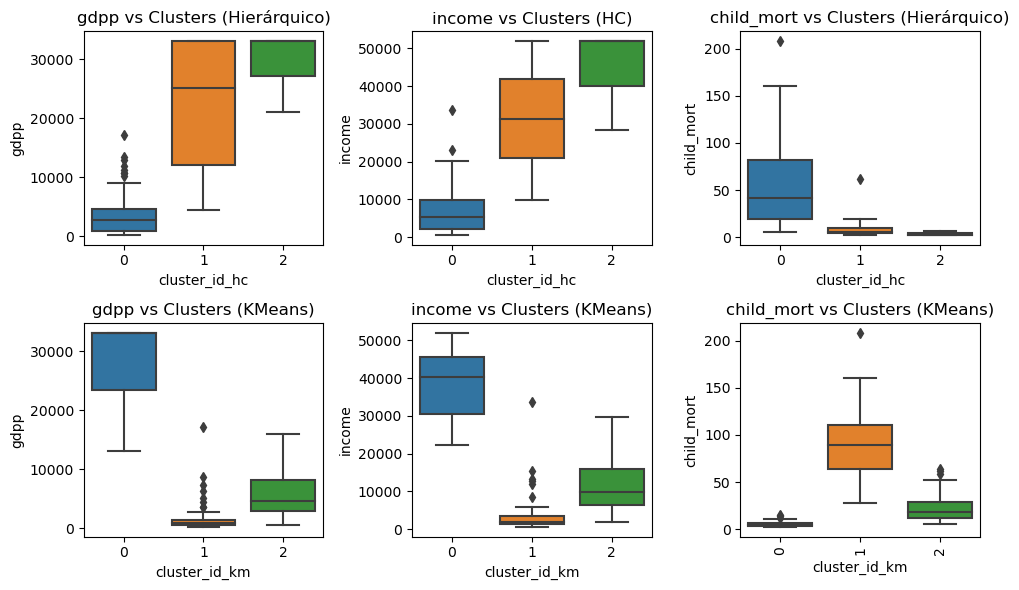

In [37]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2, 3, 1, title="gdpp vs Clusters (Hierárquico)")
ax4 = fig.add_subplot(2, 3, 4, title="gdpp vs Clusters (KMeans)")

ax2 = fig.add_subplot(2, 3, 2, title="income vs Clusters (HC)")
ax5 = fig.add_subplot(2, 3, 5, title="income vs Clusters (KMeans)")

ax3 = fig.add_subplot(2, 3, 3, title="child_mort vs Clusters (Hierárquico)")
ax6 = fig.add_subplot(2, 3, 6, title="child_mort vs Clusters (KMeans)")

sns.boxplot(df_clustered['cluster_id_hc'],df_clustered['gdpp'],ax=ax1)
sns.boxplot(df_clustered['cluster_id_km'],df_clustered['gdpp'],ax=ax4)

sns.boxplot(df_clustered['cluster_id_hc'],df_clustered['income'],ax=ax2)
sns.boxplot(df_clustered['cluster_id_km'],df_clustered['income'],ax=ax5)

sns.boxplot(df_clustered['cluster_id_hc'],df_clustered['child_mort'],ax=ax3)
sns.boxplot(df_clustered['cluster_id_km'],df_clustered['child_mort'],ax=ax6)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


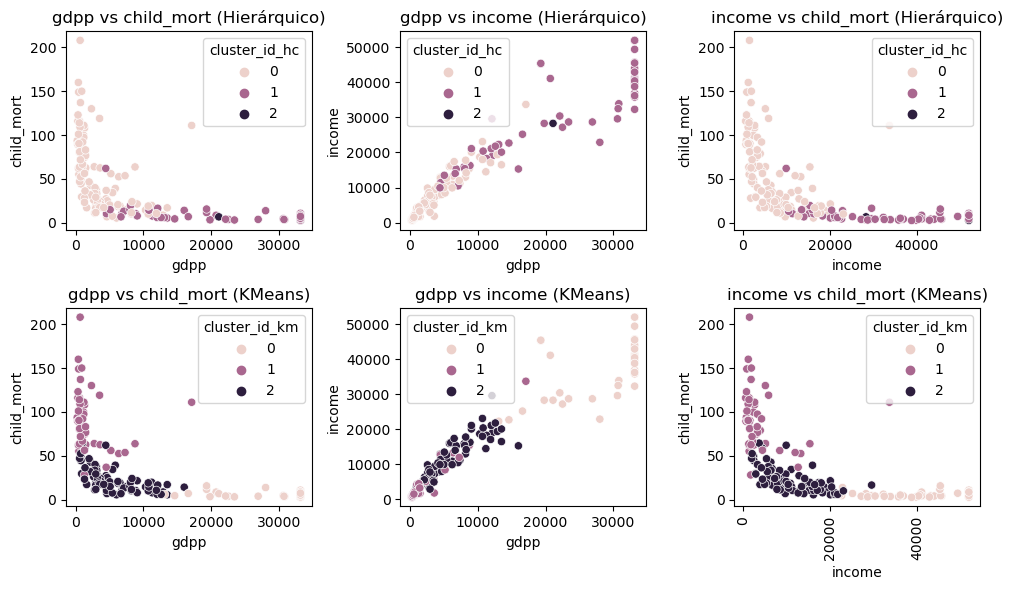

In [38]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2, 3, 1, title="gdpp vs child_mort (Hierárquico)")
ax4 = fig.add_subplot(2, 3, 4, title="gdpp vs child_mort (KMeans)")

ax2 = fig.add_subplot(2, 3, 2, title="gdpp vs income (Hierárquico)")
ax5 = fig.add_subplot(2, 3, 5, title="gdpp vs income (KMeans)")

ax3 = fig.add_subplot(2, 3, 3, title="income vs child_mort (Hierárquico)")
ax6 = fig.add_subplot(2, 3, 6, title="income vs child_mort (KMeans)")

sns.scatterplot(df_clustered['gdpp'],df_clustered['child_mort'],hue=df_clustered['cluster_id_hc'],ax=ax1)
sns.scatterplot(df_clustered['gdpp'],df_clustered['child_mort'],hue=df_clustered['cluster_id_km'],ax=ax4)

sns.scatterplot(df_clustered['gdpp'],df_clustered['income'],hue=df_clustered['cluster_id_hc'],ax=ax2)
sns.scatterplot(df_clustered['gdpp'],df_clustered['income'],hue=df_clustered['cluster_id_km'],ax=ax5)

sns.scatterplot(df_clustered['income'],df_clustered['child_mort'],hue=df_clustered['cluster_id_hc'],ax=ax3)
sns.scatterplot(df_clustered['income'],df_clustered['child_mort'],hue=df_clustered['cluster_id_km'],ax=ax6)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


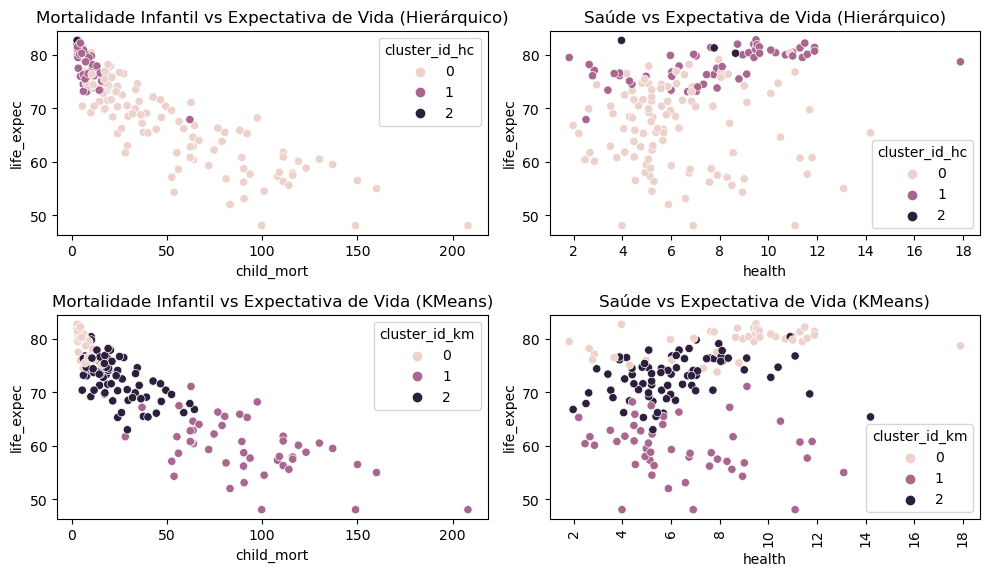

In [39]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2, 2, 1, title="Mortalidade Infantil vs Expectativa de Vida (Hierárquico)")
ax3 = fig.add_subplot(2, 2, 3, title="Mortalidade Infantil vs Expectativa de Vida (KMeans)")
ax2 = fig.add_subplot(2, 2, 2, title="Saúde vs Expectativa de Vida (Hierárquico)")
ax4 = fig.add_subplot(2, 2, 4, title="Saúde vs Expectativa de Vida (KMeans)")

sns.scatterplot(df_clustered['child_mort'],df_clustered['life_expec'],hue=df_clustered['cluster_id_hc'],ax=ax1)
sns.scatterplot(df_clustered['child_mort'],df_clustered['life_expec'],hue=df_clustered['cluster_id_km'],ax=ax3)
sns.scatterplot(df_clustered['health'],    df_clustered['life_expec'],hue=df_clustered['cluster_id_hc'],ax=ax2)
sns.scatterplot(df_clustered['health'],    df_clustered['life_expec'],hue=df_clustered['cluster_id_km'],ax=ax4)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


A partir das análises realizadas, podemos destacar que os países que mais necessitam de ajuda estão classificados na lista a seguir:

In [40]:
df_clustered[(df_clustered['cluster_id_hc']==0)].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=['True', 'True', 'False'])[['country']].head(15)

,country
26,Burundi
88,Liberia
37,"Congo, Dem. Rep."
112,Niger
132,Sierra Leone
93,Madagascar
106,Mozambique
31,Central African Republic
94,Malawi
50,Eritrea


In [41]:
df_clustered[(df_clustered['cluster_id_hc']==1)].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=['True', 'True', 'False'])[['country']].head(10)

,country
154,Turkmenistan
92,"Macedonia, FYR"
148,Thailand
104,Montenegro
24,Bulgaria
96,Maldives
100,Mauritius
117,Panama
86,Lebanon
95,Malaysia


In [42]:
df_clustered[(df_clustered['cluster_id_hc']==2)].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=['True', 'True', 'False'])[['country']].head(3)

,country
98,Malta
91,Luxembourg
133,Singapore


<a id="Reference"></a>
# Referências

https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data